# EKE and geostrophic velocity 

In [1]:
import warnings

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from shapely.errors import ShapelyDeprecationWarning
import cartopy as cart
import cartopy.crs as ccrs
import cmocean.cm as cmo
import cmocean
import file_io as io

import matplotlib as mpl
import matplotlib.patches as mpatches

warnings.filterwarnings(
    action='ignore',
    category=ShapelyDeprecationWarning,  # in cartopy
)
warnings.filterwarnings(
    action="ignore",
    category=UserWarning,
    message=r"No `(vmin|vmax)` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `\1` to avoid this step"
)

%matplotlib inline

# save figures?
saveFig = True

In [2]:
#longitude and latitude range
lon_min = -65
lon_max =  80
lat_min = -80
lat_max = -45
# depth range
zmin = 20.0
zmax = 1000.0
# density range
sig0range = (26.6, 28.0)

# temperature and salinity ranges for plotting
lon_range=(lon_min, lon_max)
lat_range=(lat_min, lat_max)
Trange=(-2.2, 6.0)
Srange=(33.5, 35.0)

In [3]:
# load fronts
pf = io.load_front("fronts/pf_kim.txt")
saccf = io.load_front("fronts/saccf_kim.txt")
saf = io.load_front("fronts/saf_kim.txt")
sbdy = io.load_front("fronts/sbdy_kim.txt")

# Load data, calculate mean and anomalies

In [4]:
# load geostrophic velocity dataset
ds = xr.open_dataset("../../so-chic-data/Stress_and_EKE/geovel_eke.nc")
ds = ds.sortby("longitude")

# calculate time mean values
ds_mean = ds.mean(dim="time", skipna=True, keep_attrs=True)
ds_mean

# calculate anomalies
ds_anomaly = ds - ds_mean

# isolate EKE and clip for plotting purposes
eke_anom = ds_anomaly.eke.clip(min=-0.005, max=0.005, keep_attrs=True)
ug_anom = ds_anomaly.u_g
vg_anom = ds_anomaly.v_g

# Plot mean EKE

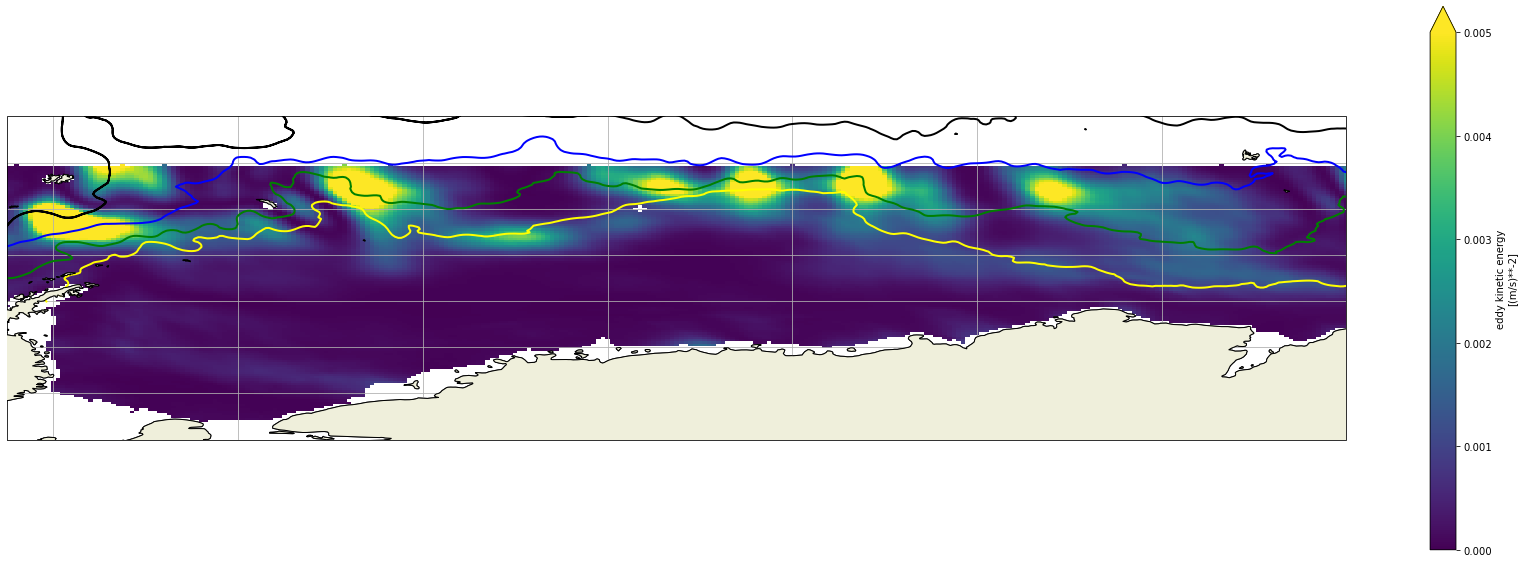

In [5]:
fig = plt.figure(figsize=(30,10)) 

p = ds_mean.eke.plot(
        subplot_kws=dict(projection=ccrs.PlateCarree()),
        vmin=0.0, vmax=0.005,
        cmap='viridis',
        transform=ccrs.PlateCarree())

p.axes.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                    ccrs.PlateCarree())
p.axes.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
p.axes.coastlines()
p.axes.gridlines()

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/eke_time_mean.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/eke_time_mean.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

# Plot mean of geostrophic velocity (zonal component)

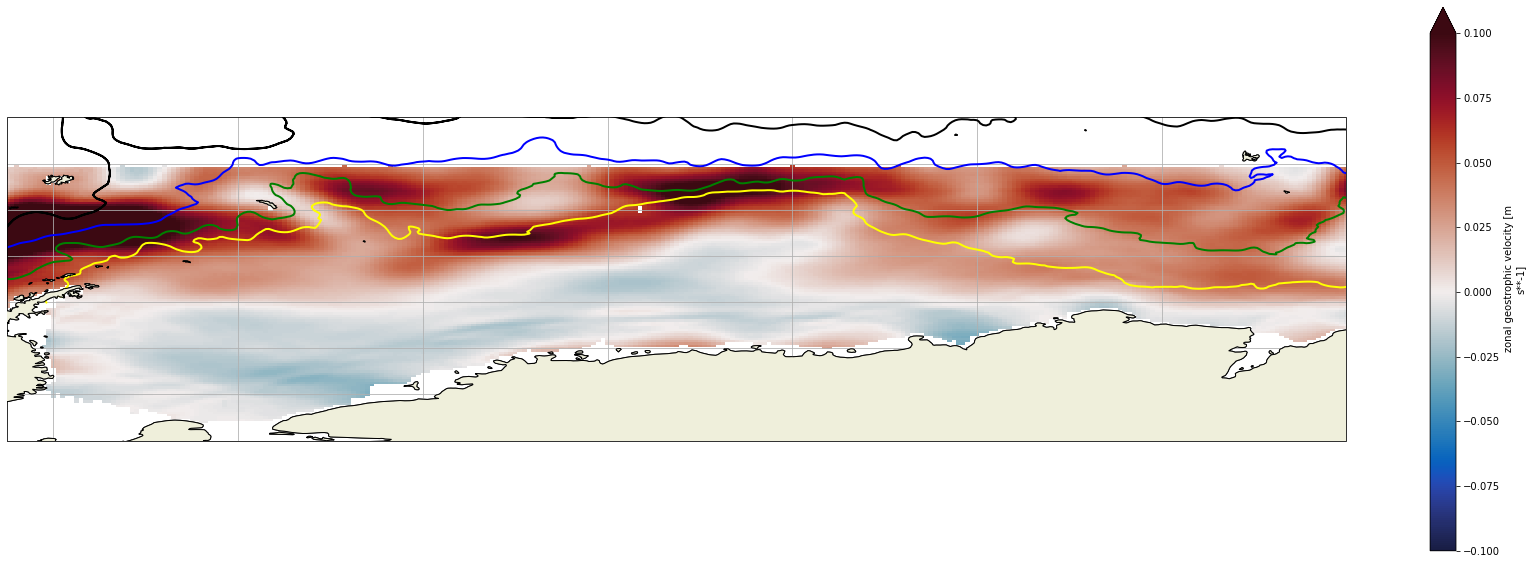

In [6]:
fig = plt.figure(figsize=(30,10)) 

p = ds_mean.u_g.plot(
        subplot_kws=dict(projection=ccrs.PlateCarree()),
        vmin = -0.10,
        vmax = 0.10,
        cmap=cmocean.cm.balance,
        transform=ccrs.PlateCarree())

p.axes.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                    ccrs.PlateCarree())
p.axes.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
p.axes.coastlines()
p.axes.gridlines()

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/ug_time_mean.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/ug_time_mean.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

# Plot mean of geostrophic velocity (meridonal component)

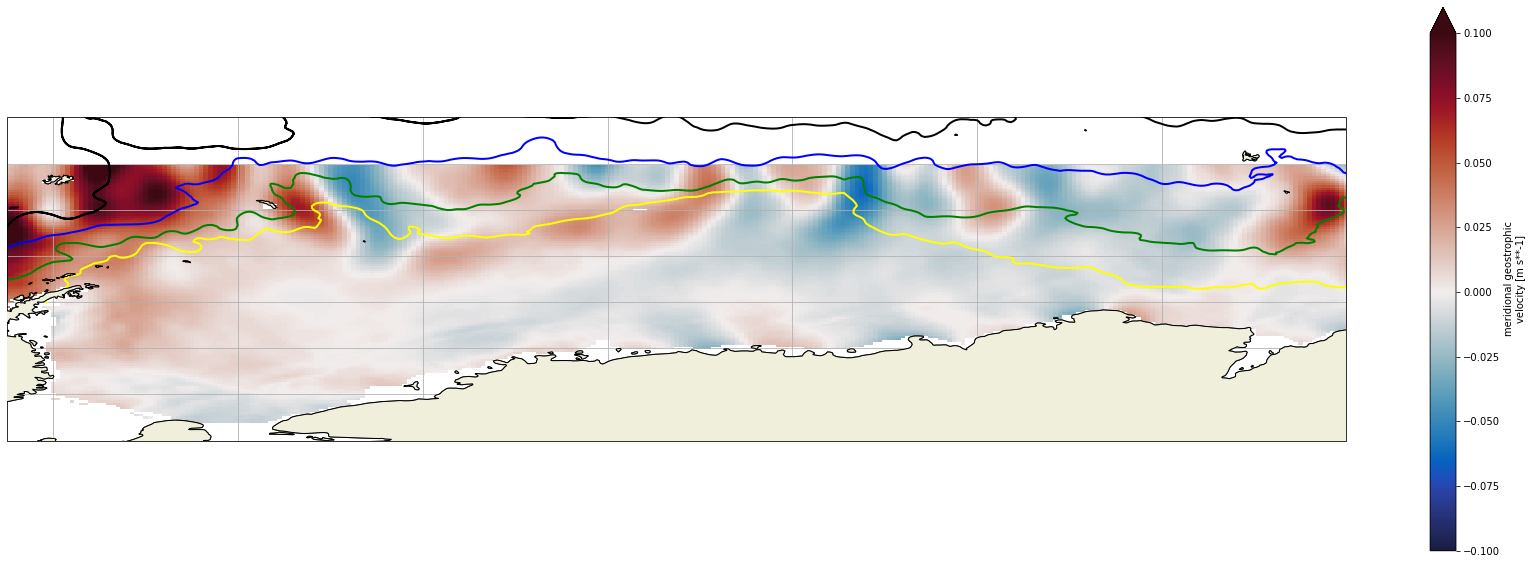

In [7]:
fig = plt.figure(figsize=(30,10)) 

p = ds_mean.v_g.plot(
        subplot_kws=dict(projection=ccrs.PlateCarree()),
        vmin = -0.10,
        vmax = 0.10,
        cmap=cmocean.cm.balance,
        transform=ccrs.PlateCarree())

p.axes.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                    ccrs.PlateCarree())
p.axes.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
p.axes.coastlines()
p.axes.gridlines()

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/vg_time_mean.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/vg_time_mean.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

# Calculate seasonal means 

https://xarray.pydata.org/en/v0.14.1/examples/monthly-means.html

In [8]:
dpm = {'noleap': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '365_day': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'standard': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'gregorian': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'proleptic_gregorian': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'all_leap': [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '366_day': [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '360_day': [0, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]}

In [9]:
def leap_year(year, calendar='standard'):
    """Determine if year is a leap year"""
    leap = False
    if ((calendar in ['standard', 'gregorian',
        'proleptic_gregorian', 'julian']) and
        (year % 4 == 0)):
        leap = True
        if ((calendar == 'proleptic_gregorian') and
            (year % 100 == 0) and
            (year % 400 != 0)):
            leap = False
        elif ((calendar in ['standard', 'gregorian']) and
                 (year % 100 == 0) and (year % 400 != 0) and
                 (year < 1583)):
            leap = False
    return leap

def get_dpm(time, calendar='standard'):
    """
    return a array of days per month corresponding to the months provided in `months`
    """
    month_length = np.zeros(len(time), dtype=np.int)

    cal_days = dpm[calendar]

    for i, (month, year) in enumerate(zip(time.month, time.year)):
        month_length[i] = cal_days[month]
        if leap_year(year, calendar=calendar) and month == 2:
            month_length[i] += 1
    return month_length

In [10]:
# Wrap it into a simple function
def season_mean(ds, calendar='standard'):
    # Make a DataArray of season/year groups
    year_season = xr.DataArray(ds.time.to_index().to_period(freq='Q-JAN').to_timestamp(how='E'),
                               coords=[ds.time], name='year_season')

    # Make a DataArray with the number of days in each month, size = len(time)
    month_length = xr.DataArray(get_dpm(ds.time.to_index(), calendar=calendar),
                                coords=[ds.time], name='month_length')
    # Calculate the weights by grouping by 'time.season'
    weights = month_length.groupby('time.season') / month_length.groupby('time.season').sum()

    # Test that the sum of the weights for each season is 1.0
    np.testing.assert_allclose(weights.groupby('time.season').sum().values, np.ones(4))

    # Calculate the weighted average
    return (ds * weights).groupby('time.season').sum(dim='time')

#### Apply seasonal mean function to the datasets

In [11]:
# just the fields (not seasonal anomalies)
eke_seasonal = season_mean(ds.eke)
ug_seasonal = season_mean(ds.u_g)
vg_seasonal = season_mean(ds.v_g)

# anomalies 
eke_seasonal_anom = season_mean(eke_anom)
ug_seasonal_anom = season_mean(ug_anom)
vg_seasonal_anom = season_mean(vg_anom)

/tmp/ipykernel_1262/1961281330.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  month_length = np.zeros(len(time), dtype=np.int)
/tmp/ipykernel_1262/1961281330.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated 

# Plot EKE seasonal mean

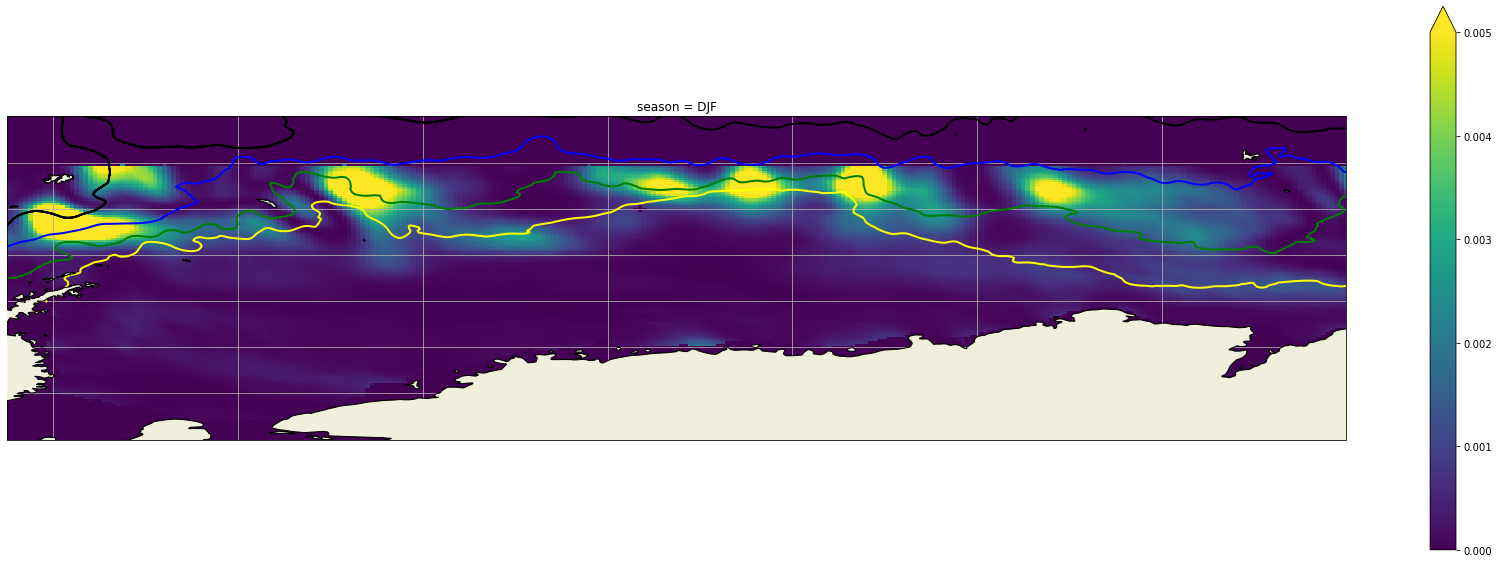

In [12]:
fig = plt.figure(figsize=(30,10)) 

p = eke_seasonal.sel(season='DJF').plot(
        subplot_kws=dict(projection=ccrs.PlateCarree()),
        vmin=0.0, vmax=0.005,
        cmap='viridis',
        transform=ccrs.PlateCarree())

p.axes.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                    ccrs.PlateCarree())
p.axes.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
p.axes.coastlines()
p.axes.gridlines()

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)


# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/eke_seasonal_djf.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/eke_seasonal_djf.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

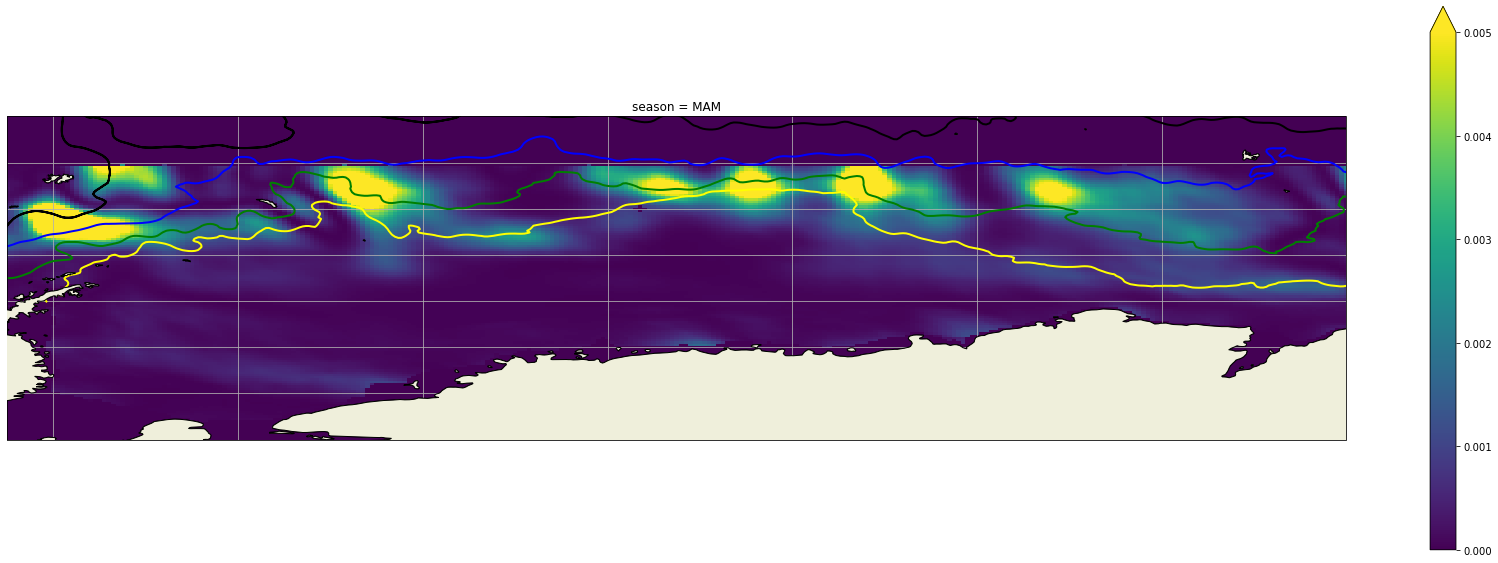

In [13]:
fig = plt.figure(figsize=(30,10)) 

p = eke_seasonal.sel(season='MAM').plot(
        subplot_kws=dict(projection=ccrs.PlateCarree()),
        vmin=0.0, vmax=0.005,
        cmap='viridis',
        transform=ccrs.PlateCarree())

p.axes.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                    ccrs.PlateCarree())

p.axes.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
p.axes.coastlines()
p.axes.gridlines()

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/eke_seasonal_mam.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/eke_seasonal_mam.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

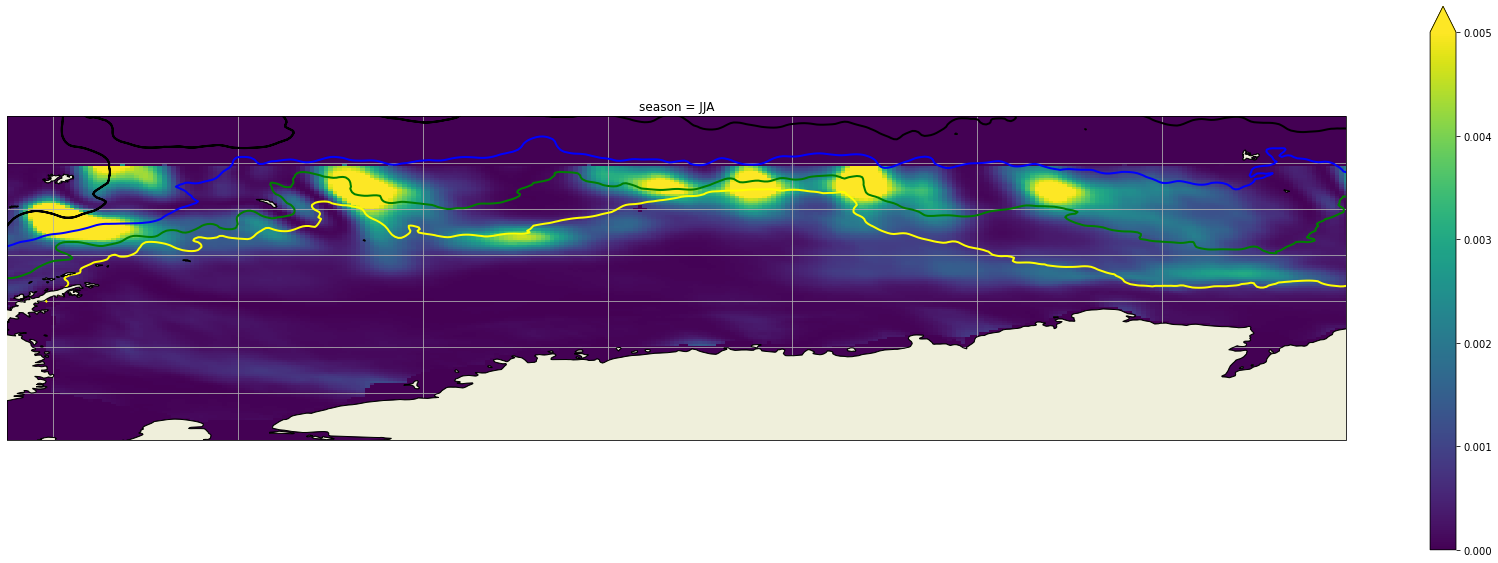

In [14]:
fig = plt.figure(figsize=(30,10)) 

p = eke_seasonal.sel(season='JJA').plot(
        subplot_kws=dict(projection=ccrs.PlateCarree()),
        vmin=0.0, vmax=0.005,
        cmap='viridis',
        transform=ccrs.PlateCarree())

p.axes.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                    ccrs.PlateCarree())

p.axes.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
p.axes.coastlines()
p.axes.gridlines()

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/eke_seasonal_jja.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/eke_seasonal_jja.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

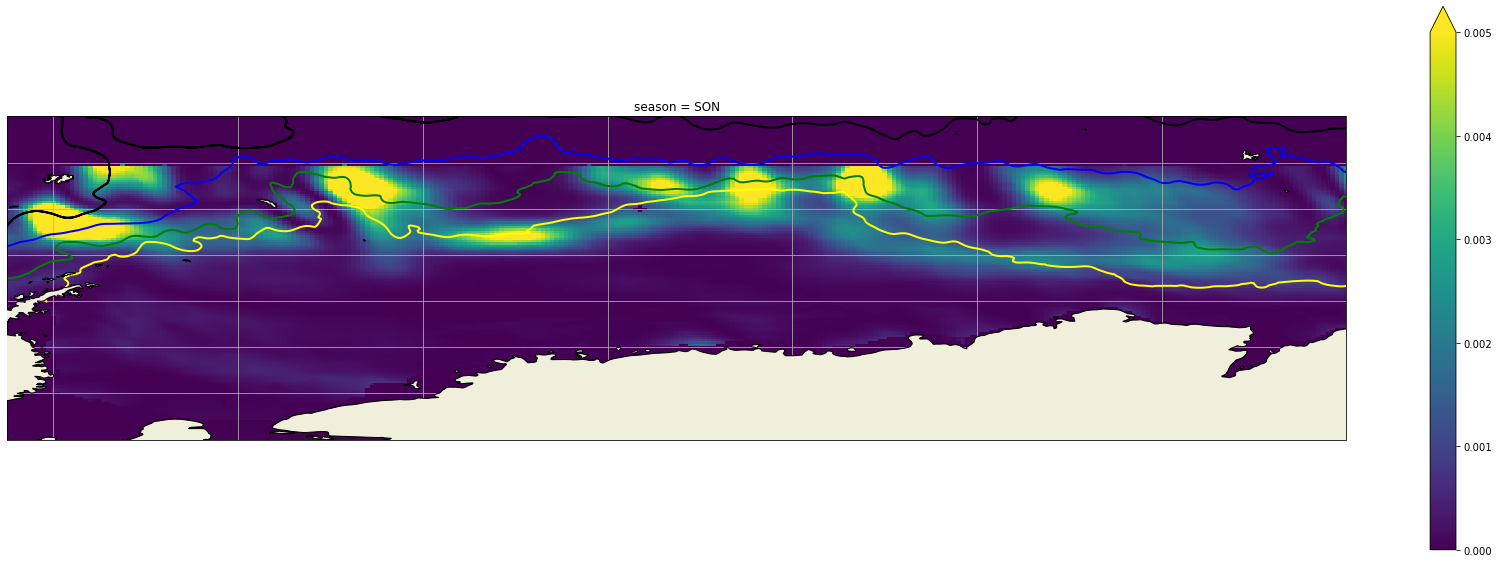

In [15]:
fig = plt.figure(figsize=(30,10)) 

p = eke_seasonal.sel(season='SON').plot(
        subplot_kws=dict(projection=ccrs.PlateCarree()),
        vmin=0.0, vmax=0.005,
        cmap='viridis',
        transform=ccrs.PlateCarree())

p.axes.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                    ccrs.PlateCarree())

p.axes.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
p.axes.coastlines()
p.axes.gridlines()

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/eke_seasonal_son.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/eke_seasonal_son.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

# Plot zonal component of geostrophic current

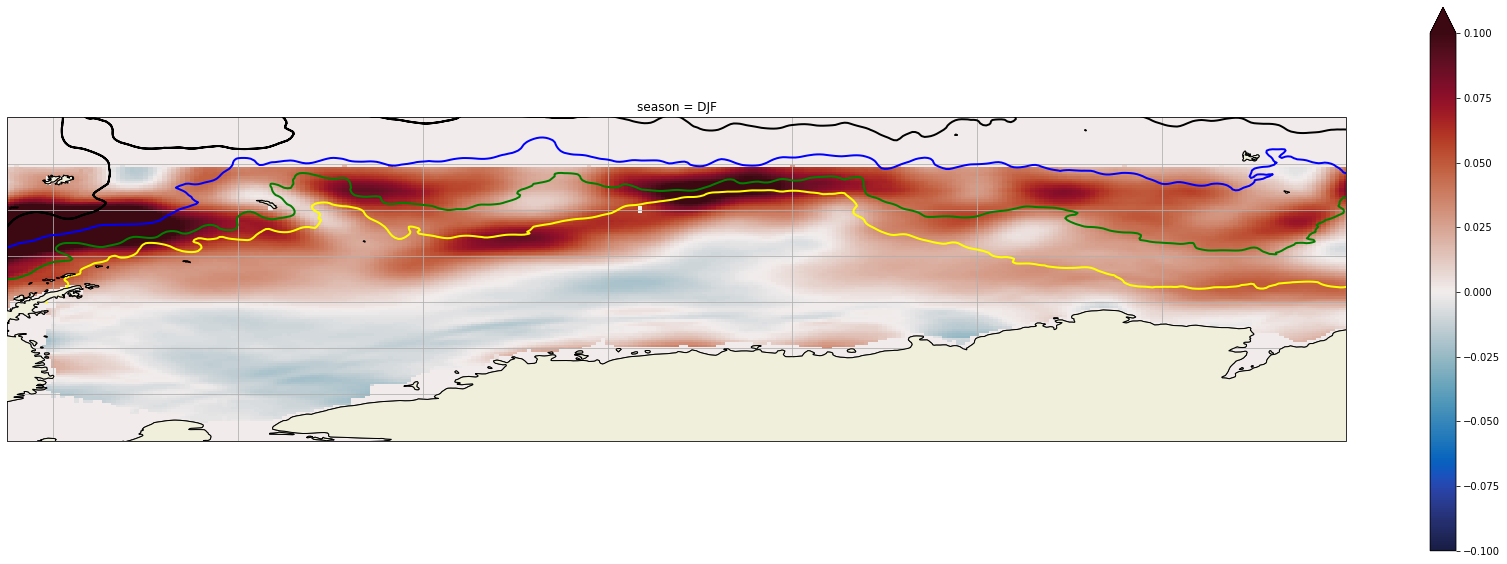

In [16]:
fig = plt.figure(figsize=(30,10)) 

p = ug_seasonal.sel(season='DJF').plot(
        subplot_kws=dict(projection=ccrs.PlateCarree()),
        cmap=cmocean.cm.balance,
        vmin = -0.1, 
        vmax = 0.1,
        transform=ccrs.PlateCarree())

p.axes.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                    ccrs.PlateCarree())

p.axes.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
p.axes.coastlines()
p.axes.gridlines()

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/ug_seasonal_djf.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/ug_seasonal_djf.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

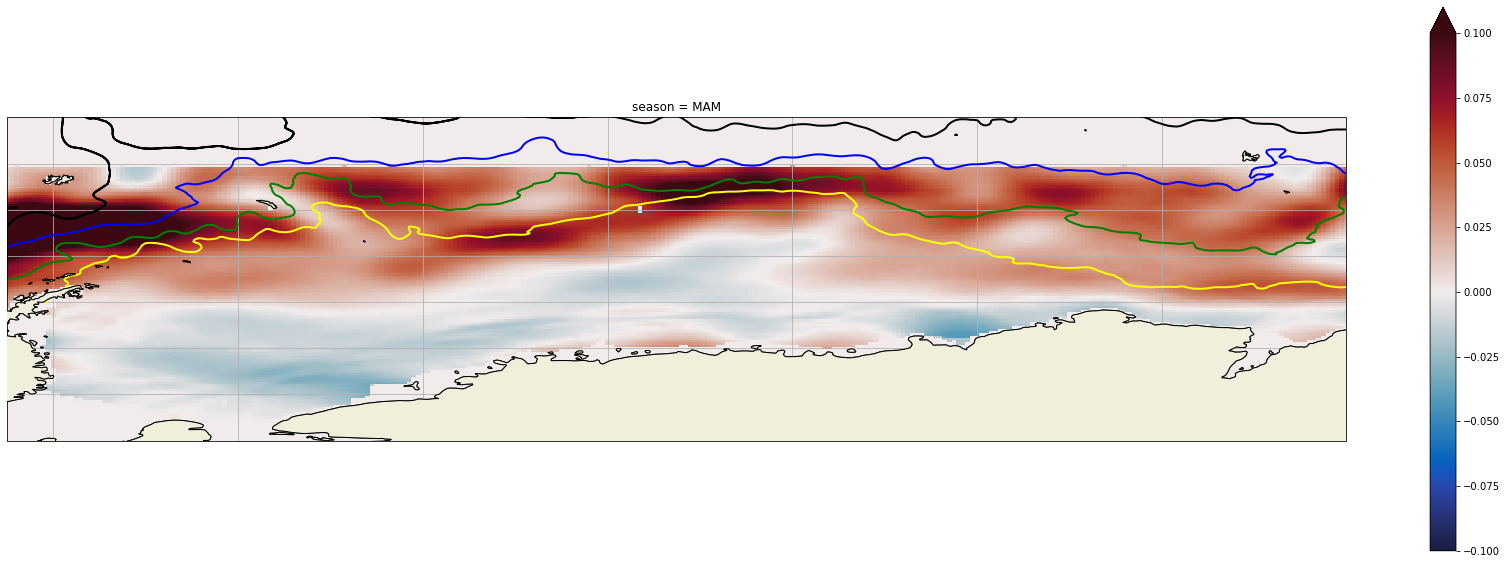

In [17]:
fig = plt.figure(figsize=(30,10)) 

p = ug_seasonal.sel(season='MAM').plot(
        subplot_kws=dict(projection=ccrs.PlateCarree()),
        cmap=cmocean.cm.balance,
        vmin = -0.1, 
        vmax = 0.1,
        transform=ccrs.PlateCarree())

p.axes.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                    ccrs.PlateCarree())

p.axes.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

p.axes.coastlines()
p.axes.gridlines()

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/ug_seasonal_mam.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/ug_seasonal_mam.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

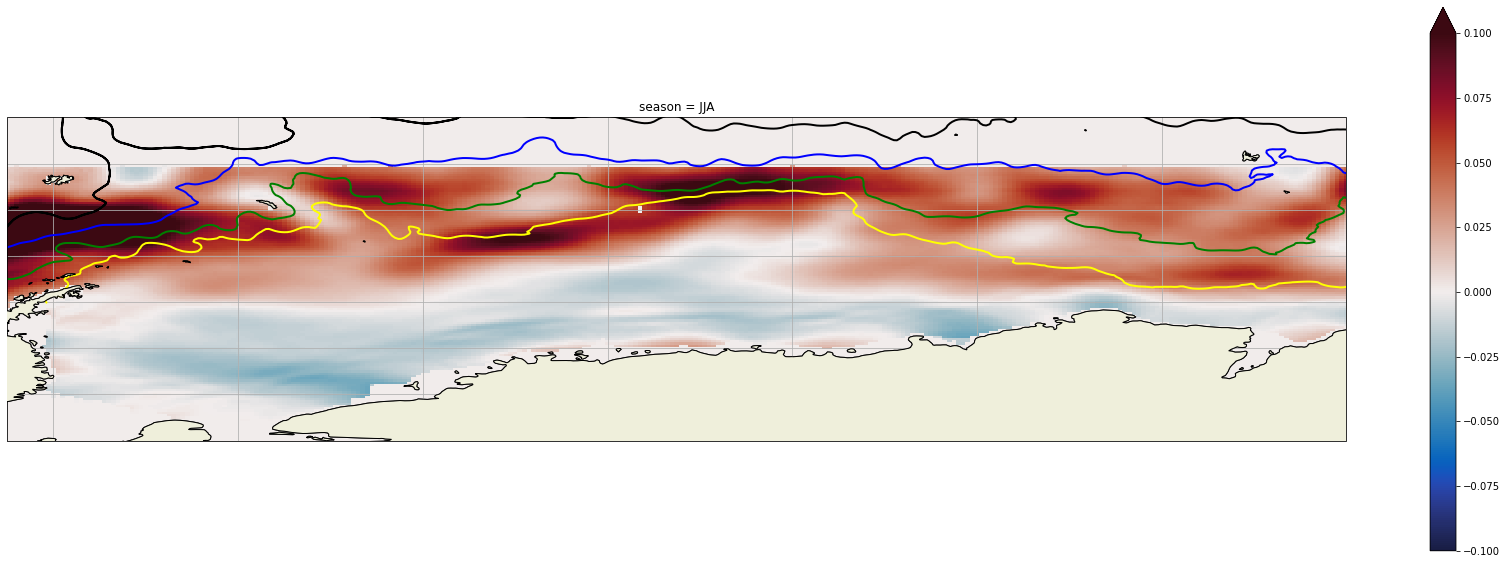

In [18]:
fig = plt.figure(figsize=(30,10)) 

p = ug_seasonal.sel(season='JJA').plot(
        subplot_kws=dict(projection=ccrs.PlateCarree()),
        cmap=cmocean.cm.balance,
        vmin = -0.1, 
        vmax = 0.1,
        transform=ccrs.PlateCarree())

p.axes.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                    ccrs.PlateCarree())

p.axes.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

p.axes.coastlines()
p.axes.gridlines()

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/ug_seasonal_jja.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/ug_seasonal_jja.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

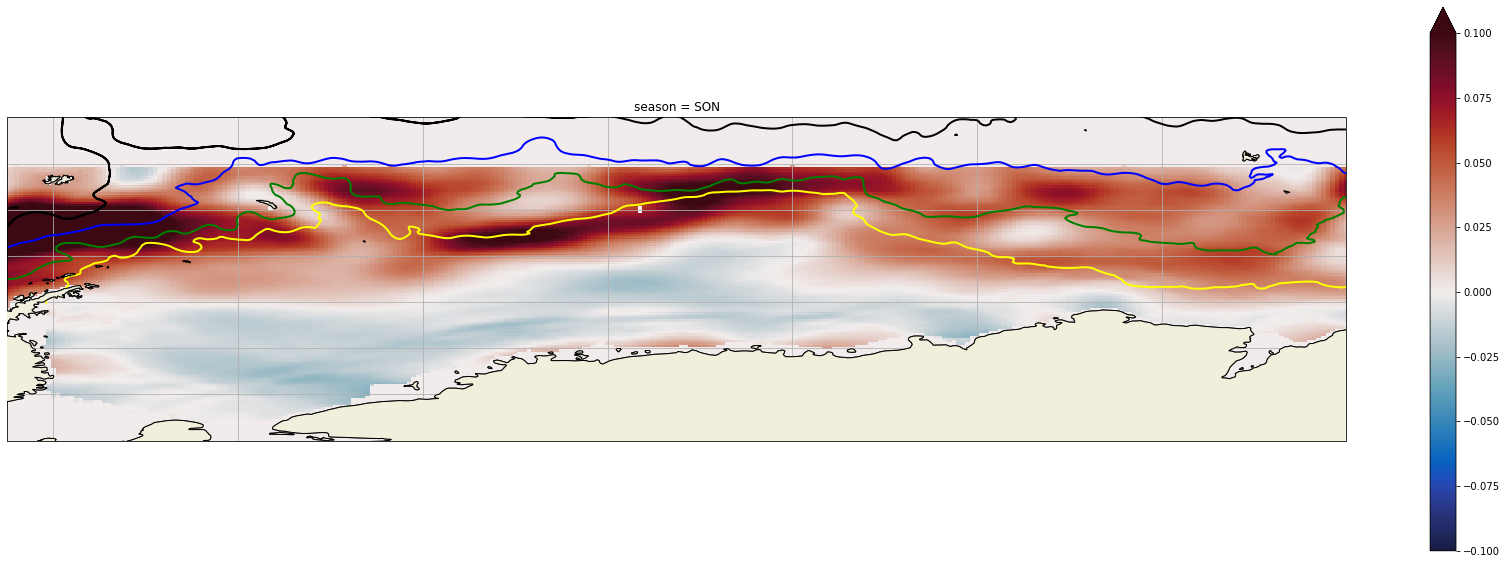

In [19]:
fig = plt.figure(figsize=(30,10)) 

p = ug_seasonal.sel(season='SON').plot(
        subplot_kws=dict(projection=ccrs.PlateCarree()),
        cmap=cmocean.cm.balance,
        vmin = -0.1, 
        vmax = 0.1,
        transform=ccrs.PlateCarree())

p.axes.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                    ccrs.PlateCarree())

p.axes.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

p.axes.coastlines()
p.axes.gridlines()

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/ug_seasonal_son.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/ug_seasonal_son.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

# Plot meridional component of geostrophic current

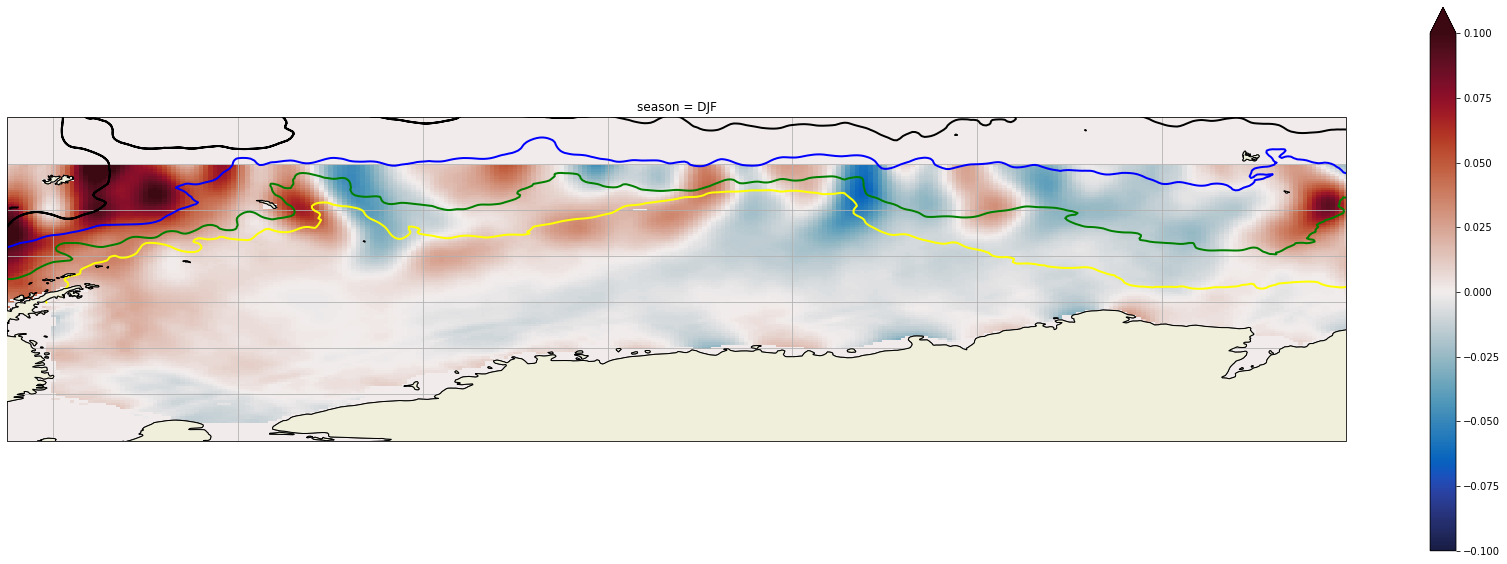

In [20]:
fig = plt.figure(figsize=(30,10)) 

p = vg_seasonal.sel(season='DJF').plot(
        subplot_kws=dict(projection=ccrs.PlateCarree()),
        cmap=cmocean.cm.balance,
        vmin = -0.1, 
        vmax = 0.1,
        transform=ccrs.PlateCarree())

p.axes.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                    ccrs.PlateCarree())

p.axes.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

p.axes.coastlines()
p.axes.gridlines()

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/vg_seasonal_djf.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/vg_seasonal_djf.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

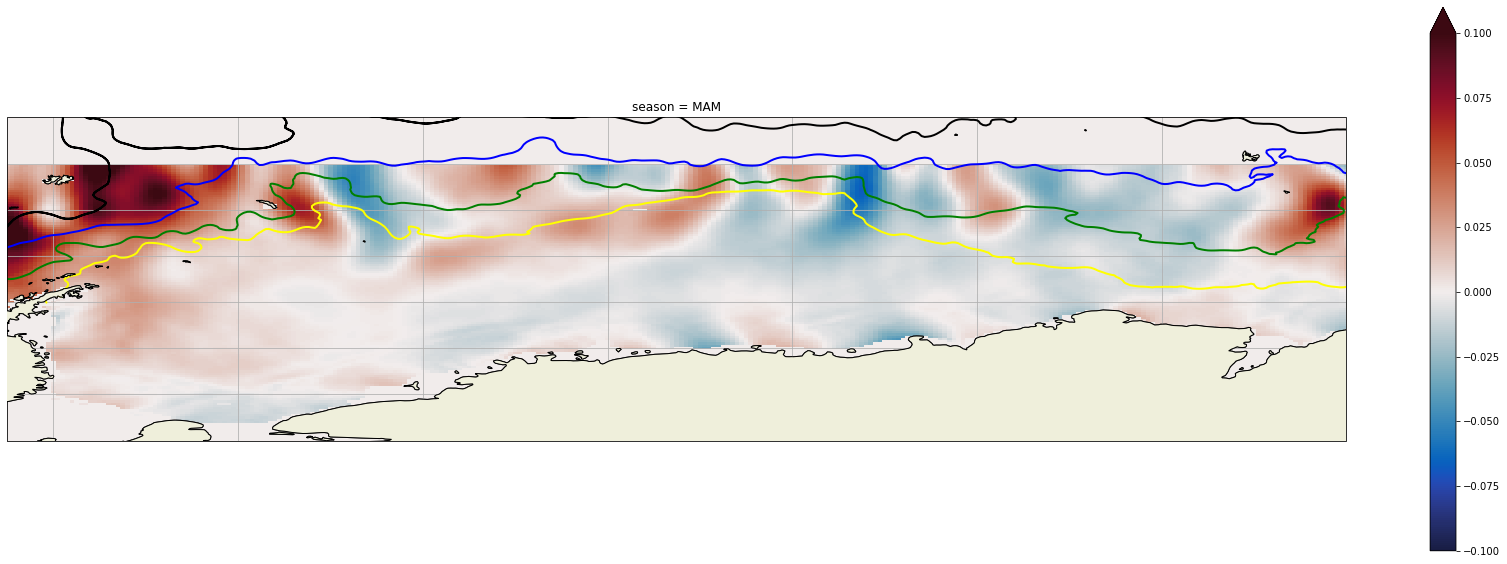

In [21]:
fig = plt.figure(figsize=(30,10)) 

p = vg_seasonal.sel(season='MAM').plot(
        subplot_kws=dict(projection=ccrs.PlateCarree()),
        cmap=cmocean.cm.balance,
        vmin = -0.1, 
        vmax = 0.1,
        transform=ccrs.PlateCarree())

p.axes.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                    ccrs.PlateCarree())

p.axes.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

p.axes.coastlines()
p.axes.gridlines()

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/vg_seasonal_mam.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/vg_seasonal_mam.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

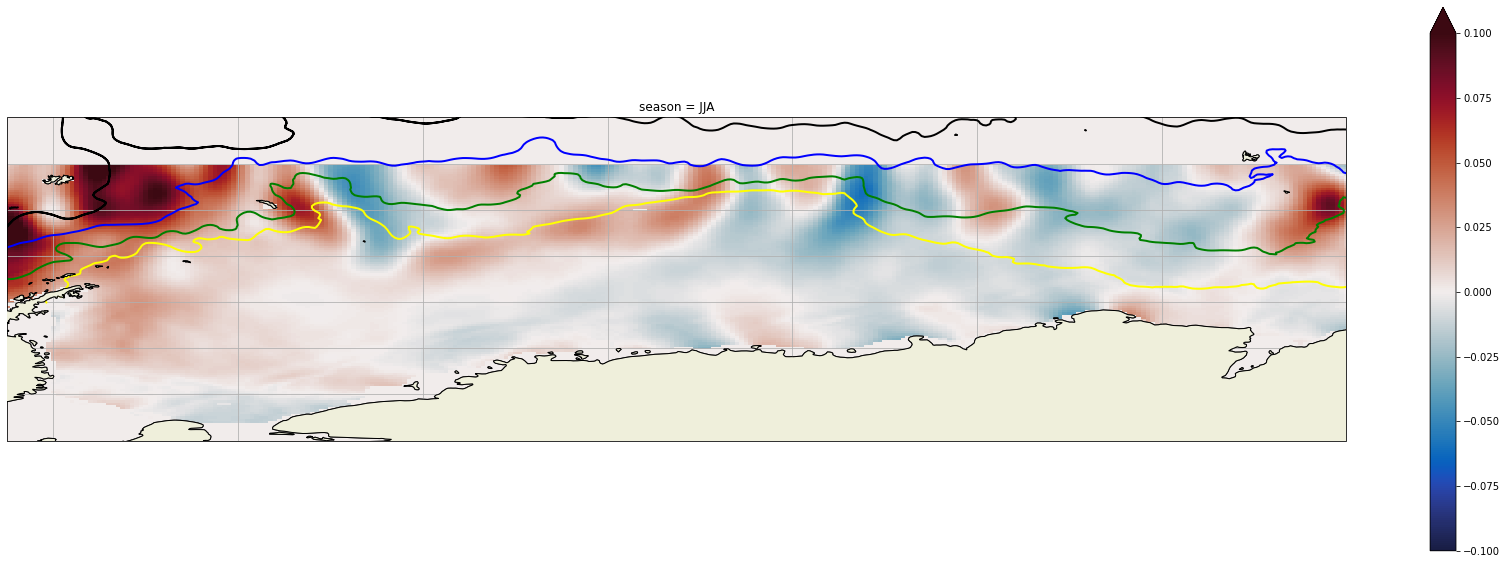

In [22]:
fig = plt.figure(figsize=(30,10)) 

p = vg_seasonal.sel(season='JJA').plot(
        subplot_kws=dict(projection=ccrs.PlateCarree()),
        cmap=cmocean.cm.balance,
        vmin = -0.1, 
        vmax = 0.1,
        transform=ccrs.PlateCarree())

p.axes.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                    ccrs.PlateCarree())

p.axes.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

p.axes.coastlines()
p.axes.gridlines()

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/vg_seasonal_jja.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/vg_seasonal_jja.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

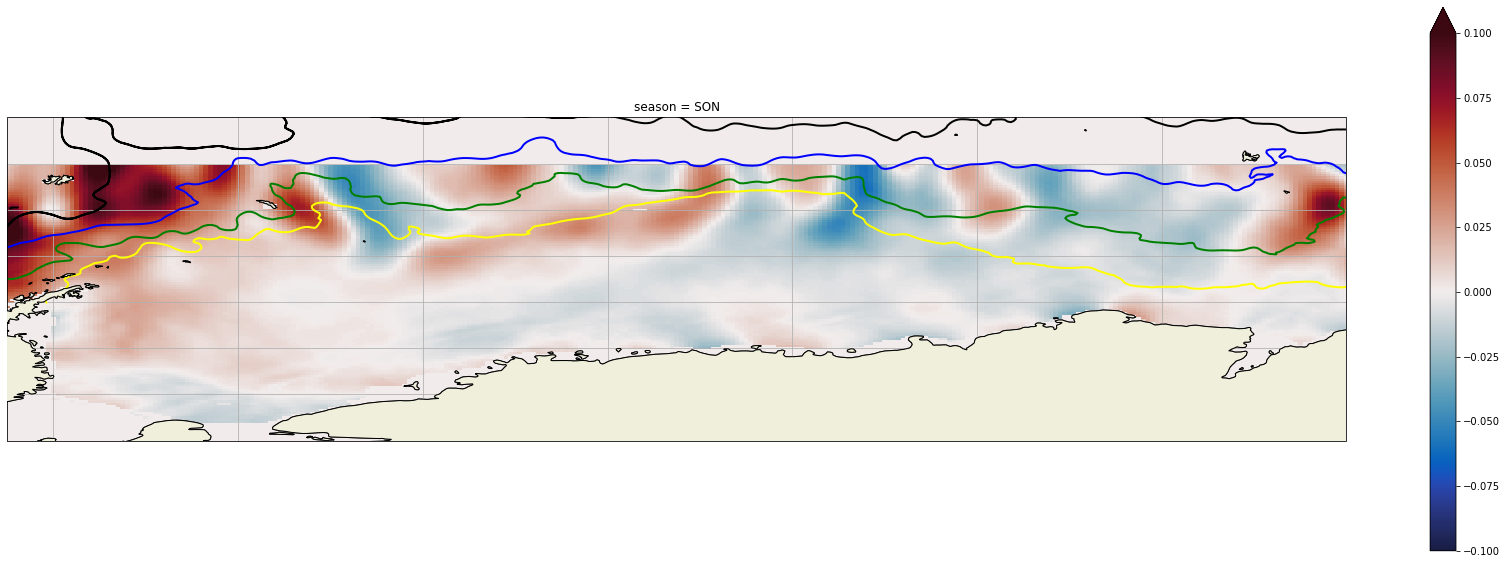

In [23]:
fig = plt.figure(figsize=(30,10)) 

p = vg_seasonal.sel(season='SON').plot(
        subplot_kws=dict(projection=ccrs.PlateCarree()),
        cmap=cmocean.cm.balance,
        vmin = -0.1, 
        vmax = 0.1,
        transform=ccrs.PlateCarree())

p.axes.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                    ccrs.PlateCarree())

p.axes.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

p.axes.coastlines()
p.axes.gridlines()

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/vg_seasonal_son.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/vg_seasonal_son.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

# Alternate view of winter (JJA) EKE

/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:2011: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


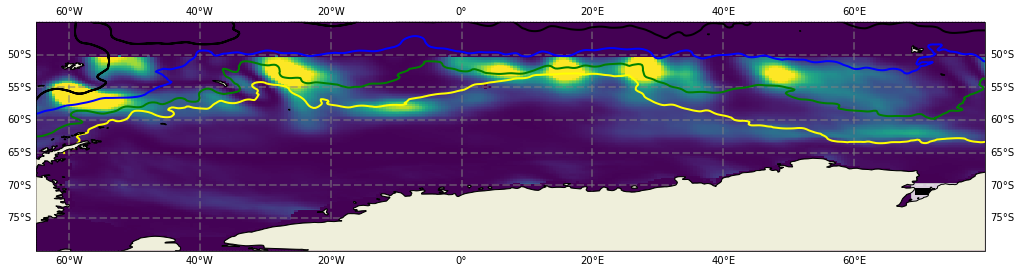

In [24]:
# make plot
plt.figure(figsize=(17, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], ccrs.PlateCarree())

# select 
eke_jja = eke_seasonal.sel(season='JJA')

# contour plot of sea ice freezing
h = ax.pcolor(eke_jja.longitude, eke_jja.latitude, eke_jja,
              transform=ccrs.PlateCarree(), 
              vmin=0.0, vmax=0.005,
              cmap="viridis")

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())
ax.coastlines(resolution='50m')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')

ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/eke_jja.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/eke_jja.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

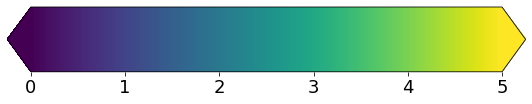

In [25]:
# separate colorbar
a = np.array([[0, 5]])    # 1e-3
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap='viridis')
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
cbar = plt.colorbar(orientation="horizontal", cax=cax, extend="both")
cbar.ax.tick_params(labelsize=18)

if saveFig==True:
    plt.savefig('plots/physical_fields/eke_jja_colorbar.pdf', bbox_inches='tight')
    plt.savefig('plots/physical_fields/eke_jja_colorbar.png', bbox_inches='tight')
    plt.show()
    plt.close()